<div style="display:block;width:100%;margin:auto;" direction=rtl align=center><br><br>
    <div  style="width:100%;margin:100;display:block;background-color:#fff0;"  display=block align=center>
        <table style="border-style:hidden;border-collapse:collapse;">             <tr>
                <td  style="border: none!important;">
                    <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
                </td>
                <td style="text-align:center;border: none!important;">
                    <h1 align=center><font size=5 color="#045F5F"> <b>Armin Ghasemi</b><br><br>810100198</i></font></h1>
                </td>
                <td style="text-align:center;border: none!important;">
                    <h1 align=center><font size=5 color="#045F5F"> <b> computer vision </b><br><br>HW_4</i></font></h1>
                </td>
                <td style="text-align:center;border: none!important;">
                    <h1 align=center><font size=5 color="#045F5F"> <b>  </b><br><br></i></font></h1>
                </td>
                <td style="border: none!important;">
                    <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
                </td>
           </tr>
        </table>
    </div>
</div>


# 1. Loading the Dataset

In this section, we load the **Fashion-MNIST** dataset using `torchvision`. This dataset is a popular benchmark for computer vision tasks and consists of grayscale images of clothing items.

### Dataset Overview
* **Training Set:** 60,000 images
* **Test Set:** 10,000 images
* **Number of Classes:** 10 (e.g., T-shirt, Trouser, Pullover, etc.)
* **Image Dimensions:** $28 \times 28$ pixels (Single Channel / Grayscale)

### A Note on Input Shapes: Fully Connected vs. CNN
Depending on the model architecture we choose, the input data requires different handling:

1.  **Fully Connected Networks (MLP):**
    If we use a standard Fully Connected network, we must **flatten** the image. Since these layers expect a 1-dimensional input vector, the 2D image matrix ($28 \times 28$) must be reshaped into a flat vector of size **784** ($28 \times 28$). This process loses the spatial relationships between pixels.

2.  **Convolutional Neural Networks (CNN):**
    If we use a CNN, we do **not** flatten the input initially. CNNs are designed to process grid-like data (like images) directly. They rely on the spatial structure (height and width) to detect features such as edges and shapes. Therefore, we pass the image with its original shape: $(1, 28, 28)$.

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.0MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 193kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.54MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 14.9MB/s]


--- Dataset Statistics ---
Number of training samples: 60000
Number of test samples: 10000
Number of classes: 10
Image shape (C, H, W): torch.Size([1, 28, 28])
------------------------------

--- Batch Information ---
Shape of one batch of images: torch.Size([64, 1, 28, 28])
Shape of one batch of labels: torch.Size([64])
------------------------------

--- Visualizing Samples ---


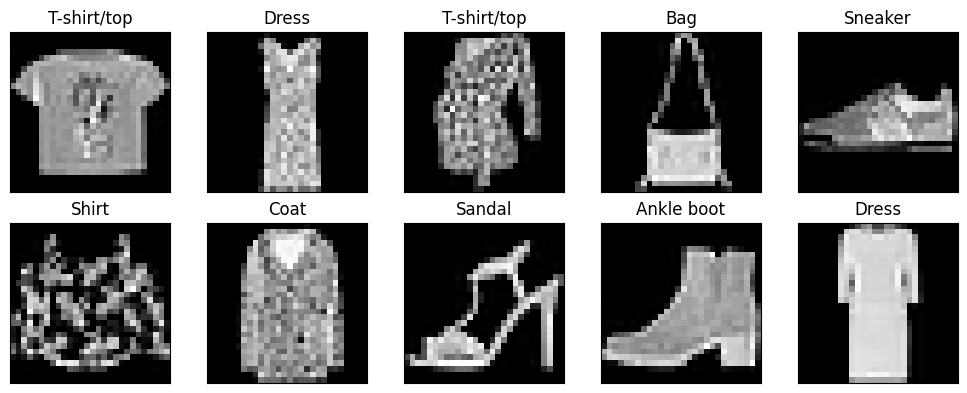

In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Define the transform as requested (ToTensor and Normalize)
# ToTensor converts the image range to [0, 1]
# Normalize((0.5,), (0.5,)) converts the range to [-1, 1]
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load training data
train_ds = datasets.FashionMNIST(
    root='F_MNIST_data',
    download=True,
    train=True,
    transform=transform
)

# Download and load testing data
test_ds = datasets.FashionMNIST(
    root='F_MNIST_data',
    download=True,
    train=False,
    transform=transform
)


# Batch size defines how many images we process at once
BATCH_SIZE = 64

train_loader = DataLoader(dataset=train_ds, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_ds, batch_size=BATCH_SIZE, shuffle=False)

# Mapping of label indices to class names for Fashion-MNIST
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# ---------------------------------------------------------
# 3. Print Dataset Statistics
# ---------------------------------------------------------
print("--- Dataset Statistics ---")
print(f"Number of training samples: {len(train_ds)}")
print(f"Number of test samples: {len(test_ds)}")
print(f"Number of classes: {len(class_names)}")
print(f"Image shape (C, H, W): {train_ds[0][0].shape}")
print("-" * 30)

# ---------------------------------------------------------
# 4. Examine a Batch and Visualize Samples
# ---------------------------------------------------------

# Get one batch of images and labels from the train_loader
dataiter = iter(train_loader)
images, labels = next(dataiter)

print("\n--- Batch Information ---")
print(f"Shape of one batch of images: {images.shape}") # (Batch_Size, Channels, Height, Width)
print(f"Shape of one batch of labels: {labels.shape}")
print("-" * 30)

# Function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize back to [0, 1] for plotting
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')

# Plot a few images from the batch
fig = plt.figure(figsize=(10, 4))
num_images_to_show = 10

print("\n--- Visualizing Samples ---")
for i in range(num_images_to_show):
    ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    imshow(images[i])
    # Set the title to the corresponding class name
    ax.set_title(class_names[labels[i]])

plt.tight_layout()
plt.show()

# 2.a - Neural Network Implementation - MLP Model

In this section, we define a **Multi-Layer Perceptron (MLP)**. This is a standard feed-forward neural network consisting of fully connected layers.

### Model Architecture Breakdown
Based on the `torchinfo` summary, our model has the following structure:

* **Input & Flatten:** The model takes a $(1, 28, 28)$ image and flattens it into a 1D vector of size **784**.
* **Hidden Layers:**
    * The first linear layer maps $784 \to 256$ features (using ReLU activation). This layer alone contains the majority of the model's weights (**200,960 params**).
    * The second linear layer maps $256 \to 128$ features (using ReLU activation).
* **Output Layer:** The final layer maps $128 \to 10$ logits, corresponding to the 10 fashion classes. No Softmax is applied here because `CrossEntropyLoss` handles it during training.

### Parameter Summary
* **Total Trainable Parameters:** **235,146**
* **Model Size:** Approximately **0.94 MB** for parameters.

In [2]:
# Install torchinfo for model summary visualization
!pip install torchinfo

import torch.nn as nn
from torchinfo import summary

class FashionMLP(nn.Module):
    def __init__(self):
        super(FashionMLP, self).__init__()

        # Flatten layer: converts (1, 28, 28) -> (784,)
        self.flatten = nn.Flatten()

        # First Fully Connected Layer: 784 -> 256
        self.fc1 = nn.Linear(in_features=784, out_features=256)
        self.relu = nn.ReLU()

        # Second Fully Connected Layer: 256 -> 128
        self.fc2 = nn.Linear(in_features=256, out_features=128)

        # Output Layer: 128 -> 10 (No Softmax here)
        self.fc3 = nn.Linear(in_features=128, out_features=10)

    def forward(self, x):
        # Flatten the image
        x = self.flatten(x)

        # Pass through first layer and apply ReLU
        x = self.fc1(x)
        x = self.relu(x)

        # Pass through second layer and apply ReLU
        x = self.fc2(x)
        x = self.relu(x)

        # Pass through output layer (returns raw logits)
        logits = self.fc3(x)
        return logits


# Instantiate the model
mlp_model = FashionMLP()

# Move model to GPU if available (optional but recommended)
device = "cuda" if torch.cuda.is_available() else "cpu"
mlp_model = mlp_model.to(device)

print(f"Using device: {device}")

# Print the model structure and parameter count using torchinfo
# We pass a dummy input size (Batch_Size, Channel, Height, Width)
summary(mlp_model, input_size=(64, 1, 28, 28))

Using device: cuda


Layer (type:depth-idx)                   Output Shape              Param #
FashionMLP                               [64, 10]                  --
├─Flatten: 1-1                           [64, 784]                 --
├─Linear: 1-2                            [64, 256]                 200,960
├─ReLU: 1-3                              [64, 256]                 --
├─Linear: 1-4                            [64, 128]                 32,896
├─ReLU: 1-5                              [64, 128]                 --
├─Linear: 1-6                            [64, 10]                  1,290
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 15.05
Input size (MB): 0.20
Forward/backward pass size (MB): 0.20
Params size (MB): 0.94
Estimated Total Size (MB): 1.34

# 2.b - Neural Network Implementation - CNN Model

In this section, we implement a **Convolutional Neural Network (CNN)**. Unlike the MLP, which treats pixels as independent features, the CNN preserves the spatial structure of the image, making it highly effective for visual tasks.

### Model Architecture Breakdown

The `FashionCNN` consists of two main parts:

1.  **Feature Extractor (Convolutional Layers):**
    * **Layer 1:** Detects low-level features (edges, corners) using 32 filters. The output size reduces to **14 x 14** via MaxPool.
    * **Layer 2:** Detects higher-level features using 64 filters. The output size reduces further to **7 x 7** via MaxPool.
    * **BatchNorm & ReLU:** Added for training stability and non-linearity.

2.  **Classifier (Fully Connected Layers):**
    * **Flatten:** The feature maps **(64, 7, 7)** are flattened into a vector of size **3136**.
    * **Dense Layers:** This vector is passed through a large hidden layer (600 units) and then to the final output layer (10 classes). We also use **Dropout** here to reduce overfitting.

### Parameter Summary & Comparison with MLP

* **Total Trainable Parameters:** **1,907,218**
* **Comparison:**
    * **Size:** This CNN is significantly larger than our previous MLP (~235k params). Most of these parameters (**98%**) come from the transition layer (`fc1`), where the flattened features connect to the dense layer.
    * **Performance:** Despite being computationally heavier, the CNN is expected to achieve higher accuracy because it utilizes **convolutions** to learn spatial hierarchies, whereas the MLP loses this information during the initial flattening process.

In [3]:
import torch.nn as nn
from torchinfo import summary

class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN, self).__init__()

        # Convolution Block 1
        # Input: (1, 28, 28) -> Output: (32, 28, 28) (padding keeps size) -> Pool: (32, 14, 14)
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32), # Optional: Helps with faster convergence
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Convolution Block 2
        # Input: (32, 14, 14) -> Output: (64, 14, 14) -> Pool: (64, 7, 7)
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Fully Connected Layers
        self.flatten = nn.Flatten()

        # Why 64 * 7 * 7?
        # The image started at 28x28. Two poolings divided it by 2 twice: 28 -> 14 -> 7.
        # The output channels from layer2 are 64.
        self.fc1 = nn.Linear(in_features=64 * 7 * 7, out_features=600)
        self.relu = nn.ReLU()
        self.drop = nn.Dropout(0.25) # Dropout to prevent overfitting
        self.fc2 = nn.Linear(in_features=600, out_features=10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.flatten(out)
        out = self.fc1(out)
        out = self.relu(out)
        out = self.drop(out)
        out = self.fc2(out)
        return out

# Instantiate the CNN model
cnn_model = FashionCNN()

# Move model to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
cnn_model = cnn_model.to(device)

print(f"Using device: {device}")

# Print the model structure and parameter count
summary(cnn_model, input_size=(64, 1, 28, 28))

Using device: cuda


Layer (type:depth-idx)                   Output Shape              Param #
FashionCNN                               [64, 10]                  --
├─Sequential: 1-1                        [64, 32, 14, 14]          --
│    └─Conv2d: 2-1                       [64, 32, 28, 28]          320
│    └─BatchNorm2d: 2-2                  [64, 32, 28, 28]          64
│    └─ReLU: 2-3                         [64, 32, 28, 28]          --
│    └─MaxPool2d: 2-4                    [64, 32, 14, 14]          --
├─Sequential: 1-2                        [64, 64, 7, 7]            --
│    └─Conv2d: 2-5                       [64, 64, 14, 14]          18,496
│    └─BatchNorm2d: 2-6                  [64, 64, 14, 14]          128
│    └─ReLU: 2-7                         [64, 64, 14, 14]          --
│    └─MaxPool2d: 2-8                    [64, 64, 7, 7]            --
├─Flatten: 1-3                           [64, 3136]                --
├─Linear: 1-4                            [64, 600]                 1,882,200
├─

# 3. Loss Function and Optimizer Definition

In this section, we configure the training process by selecting the loss function and optimization algorithms.

### Loss Function: Cross-Entropy
We use **`nn.CrossEntropyLoss`** for both models. This is the standard objective function for multi-class classification problems.

**Mathematical Formulation:**
The Cross-Entropy Loss measures the performance of a classification model whose output is a probability value between 0 and 1. The loss increases as the predicted probability diverges from the actual label. The formula is:

$$Loss = - \sum_{c=1}^{M} y_{o,c} \log(p_{o,c})$$

Where:
* $M$ is the number of classes (10 in Fashion-MNIST).
* $y_{o,c}$ is a binary indicator (0 or 1) if class label $c$ is the correct classification for observation $o$.
* $p_{o,c}$ is the predicted probability that observation $o$ is of class $c$.

**Key Implementation Detail:**
In PyTorch, `nn.CrossEntropyLoss` combines **`nn.LogSoftmax`** and **`nn.NLLLoss`** (Negative Log Likelihood Loss) in a single class. This is why our neural networks (MLP and CNN) output raw logits (unbounded scores) instead of probabilities. The loss function automatically applies the Softmax activation internally to convert logits into probabilities before calculating the loss.

### Optimizers
* **For MLP:** We use the **Adam** optimizer with a learning rate of **0.001**, as specified in the project requirements.
* **For CNN:** We also use **Adam** with an initial learning rate of **0.001**.

### Learning Rate Scheduler (CNN Only)
To further improve the performance of the CNN model, we implement a **Learning Rate Scheduler** (`ReduceLROnPlateau`).
* **Mechanism:** It monitors the validation loss during training.
* **Action:** If the loss does not decrease for **3 consecutive epochs** (patience), the scheduler reduces the learning rate by **50%** (factor of 0.5). This helps the model to fine-tune its weights and find a better local minimum when convergence slows down.

In [7]:
import torch.optim as optim


# Define the Loss Function
criterion = nn.CrossEntropyLoss()

# --- Optimizer for MLP ---
# As requested in the image: Adam optimizer with learning rate 0.001
optimizer_mlp = optim.Adam(mlp_model.parameters(), lr=0.001)

# --- Optimizer for CNN ---
# We also use Adam as it generally converges faster than SGD for this task.
optimizer_cnn = optim.Adam(cnn_model.parameters(), lr=0.001)

# --- Learning Rate Scheduler for CNN ---

scheduler_cnn = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer_cnn,
    mode='min',
    factor=0.5,
    patience=3,
)

print("Loss function and optimizers defined successfully.")

Loss function and optimizers defined successfully.


# 4. Model Training

In this section, we executed the training loop for both the **MLP** and **CNN** models. We trained each model for **20 epochs** to ensure they had sufficient time to learn features from the Fashion-MNIST dataset.

### Training Process Overview
* **Execution:** We used the `train_model` function to handle the forward pass, loss calculation, backpropagation, and weight updates.
* **Monitoring:** Throughout the process, we tracked **Loss** (error) and **Accuracy** for both training and validation sets to monitor convergence.
* **Optimization:** The optimizer (`Adam`) updated the weights, and for the CNN, a scheduler was active to adjust the learning rate if the validation loss stopped improving.

### Brief Observations
* **MLP Progress:** The model converged steadily. As seen in the logs, the training loss decreased consistently, and the validation accuracy stabilized around **88.7%**.
* **CNN Progress:** The CNN learned significantly faster and achieved a higher validation accuracy of approximately **92.7%**. However, in the final epochs, the training accuracy approached ~99% while validation loss slightly increased, which is a typical sign that the model is beginning to overfit.

In [8]:
import time


def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler=None, num_epochs=20, device='cuda'):
    """
    Generic training function that handles:
    1. Training loop (forward, backward, optimizer step)
    2. Validation loop (evaluation without gradients)
    3. Logging and history tracking
    """

    # Dictionary to store the history of loss and accuracy for plotting
    history = {
        'train_loss': [], 'train_acc': [],
        'val_loss': [], 'val_acc': []
    }

    print(f"Starting training on device: {device} for {num_epochs} epochs...")
    start_time = time.time()

    for epoch in range(num_epochs):
        # --- Training Phase ---
        model.train() # Set model to training mode (enables Dropout/BatchNorm)
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels) # Calculate Loss

            # Backward pass and optimization
            optimizer.zero_grad() # Clear gradients
            loss.backward()       # Backpropagation
            optimizer.step()      # Update weights

            # Track metrics
            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        epoch_train_loss = running_loss / total_train
        epoch_train_acc = 100 * correct_train / total_train

        # --- Validation Phase ---
        model.eval() # Set model to evaluation mode (disables Dropout/BatchNorm)
        running_val_loss = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad(): # No gradient calculation needed for validation
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)

                outputs = model(images)
                loss = criterion(outputs, labels)

                running_val_loss += loss.item() * images.size(0)
                _, predicted = torch.max(outputs, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        epoch_val_loss = running_val_loss / total_val
        epoch_val_acc = 100 * correct_val / total_val

        # --- Store History ---
        history['train_loss'].append(epoch_train_loss)
        history['train_acc'].append(epoch_train_acc)
        history['val_loss'].append(epoch_val_loss)
        history['val_acc'].append(epoch_val_acc)

        # --- Scheduler Step (if provided) ---
        if scheduler:
            # Note: ReduceLROnPlateau expects the metric to monitor (val_loss)
            scheduler.step(epoch_val_loss)

        # --- Print Stats ---
        print(f"Epoch [{epoch+1}/{num_epochs}] | "
              f"Train Loss: {epoch_train_loss:.4f} | Train Acc: {epoch_train_acc:.2f}% | "
              f"Val Loss: {epoch_val_loss:.4f} | Val Acc: {epoch_val_acc:.2f}%")

    end_time = time.time()
    print(f"Training finished in {end_time - start_time:.2f} seconds.")
    return history


device = "cuda" if torch.cuda.is_available() else "cpu"

print("="*30)
print("TRAINING MLP MODEL")
print("="*30)
mlp_history = train_model(
    model=mlp_model,
    train_loader=train_loader,
    val_loader=test_loader, # Using test set as validation
    criterion=criterion,
    optimizer=optimizer_mlp,
    scheduler=None, # No scheduler for MLP
    num_epochs=20,
    device=device
)

print("\n" + "="*30)
print("TRAINING CNN MODEL")
print("="*30)
cnn_history = train_model(
    model=cnn_model,
    train_loader=train_loader,
    val_loader=test_loader,
    criterion=criterion,
    optimizer=optimizer_cnn,
    scheduler=scheduler_cnn, # Using scheduler for CNN
    num_epochs=20,
    device=device
)

TRAINING MLP MODEL
Starting training on device: cuda for 20 epochs...
Epoch [1/20] | Train Loss: 0.4882 | Train Acc: 82.24% | Val Loss: 0.4669 | Val Acc: 82.80%
Epoch [2/20] | Train Loss: 0.3665 | Train Acc: 86.55% | Val Loss: 0.3844 | Val Acc: 86.13%
Epoch [3/20] | Train Loss: 0.3295 | Train Acc: 87.81% | Val Loss: 0.3807 | Val Acc: 86.32%
Epoch [4/20] | Train Loss: 0.3060 | Train Acc: 88.74% | Val Loss: 0.3474 | Val Acc: 87.44%
Epoch [5/20] | Train Loss: 0.2851 | Train Acc: 89.37% | Val Loss: 0.3401 | Val Acc: 88.07%
Epoch [6/20] | Train Loss: 0.2693 | Train Acc: 90.01% | Val Loss: 0.3682 | Val Acc: 86.70%
Epoch [7/20] | Train Loss: 0.2561 | Train Acc: 90.36% | Val Loss: 0.3605 | Val Acc: 87.37%
Epoch [8/20] | Train Loss: 0.2415 | Train Acc: 90.92% | Val Loss: 0.3579 | Val Acc: 87.81%
Epoch [9/20] | Train Loss: 0.2328 | Train Acc: 91.26% | Val Loss: 0.3404 | Val Acc: 88.04%
Epoch [10/20] | Train Loss: 0.2168 | Train Acc: 91.84% | Val Loss: 0.3519 | Val Acc: 88.08%
Epoch [11/20] | Tra

# 5. Model evaluation

Comparing the confusion matrices allows us to understand *where* and *why* one model outperforms the other.

**1. General Accuracy (Diagonal Performance)**
The diagonal values represent correct predictions. The **CNN** consistently achieves higher numbers on the diagonal compared to the **MLP**.
* **Example (Sandal):** The CNN is nearly perfect with **982** correct predictions, while the MLP gets **907** correct.
* **Example (Pullover):** The CNN correctly identifies **917** Pullovers, significantly better than the MLP's **850**.

**2. The "Shirt" Challenge (Visual Similarity)**
The class `Shirt` is the most difficult for both models due to its similarity to `T-shirt/top`, `Pullover`, and `Coat`.
* **MLP:** Correctly identified only **713** Shirts. It confused **103** Shirts as T-shirts and **80** as Pullovers.
* **CNN:** Improved performance with **763** correct predictions. However, it still confused **96** Shirts with T-shirts, showing that distinguishing these requires very fine-grained details.

**3. Spatial Features: Coat vs. Pullover**
This comparison highlights the power of CNNs in detecting textures and shapes (like zippers or buttons).
* **MLP:** Failed significantly here, misclassifying **113** Coats as Pullovers.
* **CNN:** Drastically reduced this specific error to **66**, proving it "sees" the difference between the two garments better.

**4. Footwear Distinction**
* **MLP:** Struggles slightly to separate `Sneaker` from `Ankle boot` (mistaking them roughly ~30 times each way).
* **CNN:** Handles footwear exceptionally well, with very few confusions between sneakers and boots.

**Conclusion:**
The **CNN** architecture is superior for this task. By preserving spatial relationships, it reduces confusion between visually similar classes (like Coats and Pullovers) where the **MLP** (which flattens pixels) fails to capture the structural differences.


==================== Analyzing MLP Model ====================
Final Test Accuracy: 88.73%


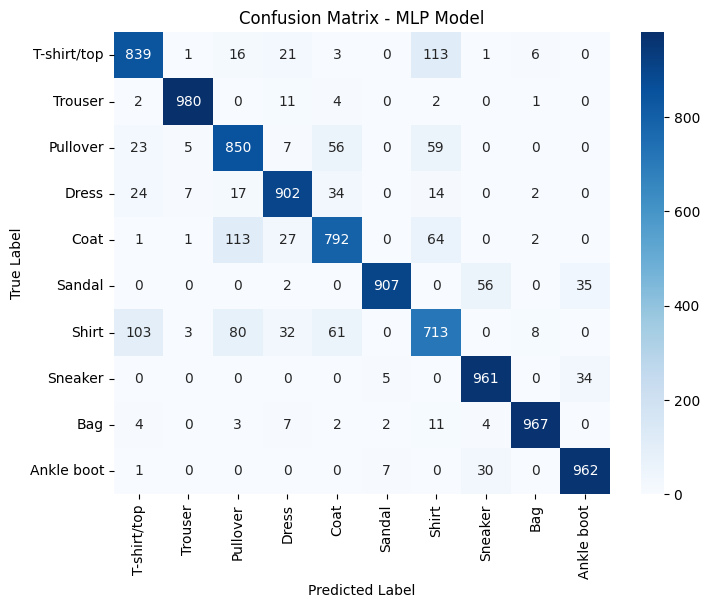

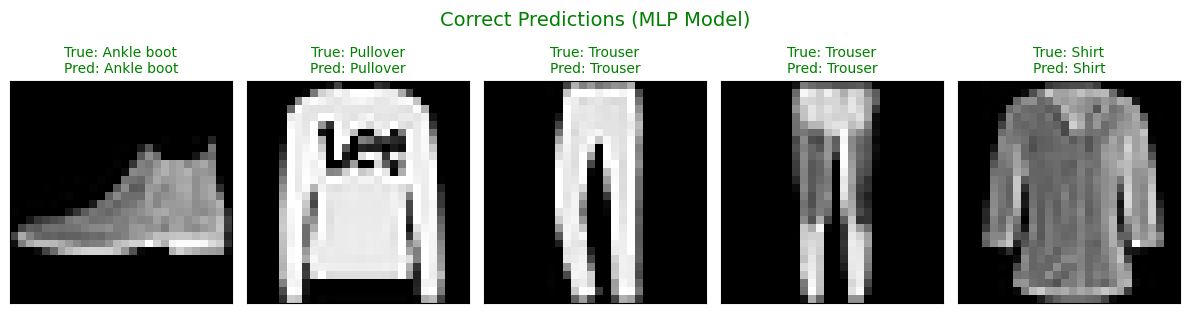

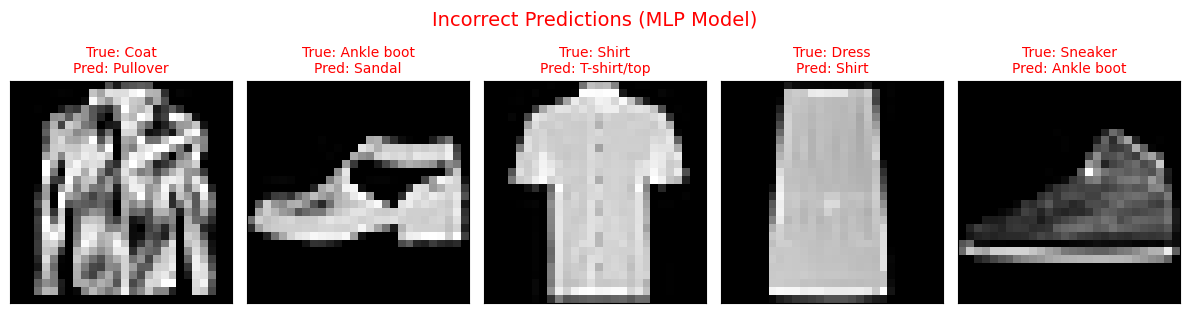


==================== Analyzing CNN Model ====================
Final Test Accuracy: 92.67%


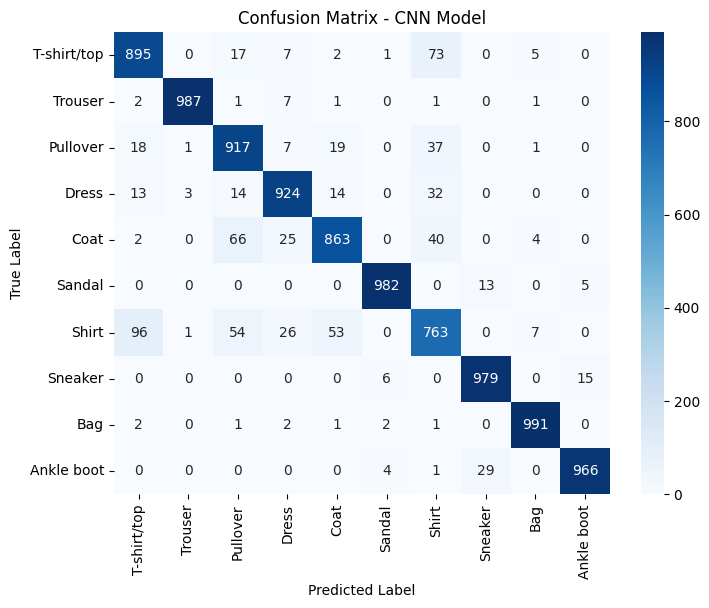

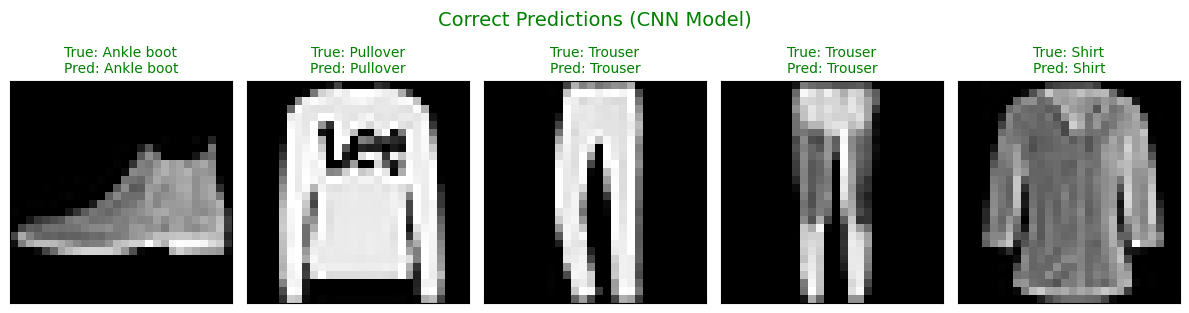

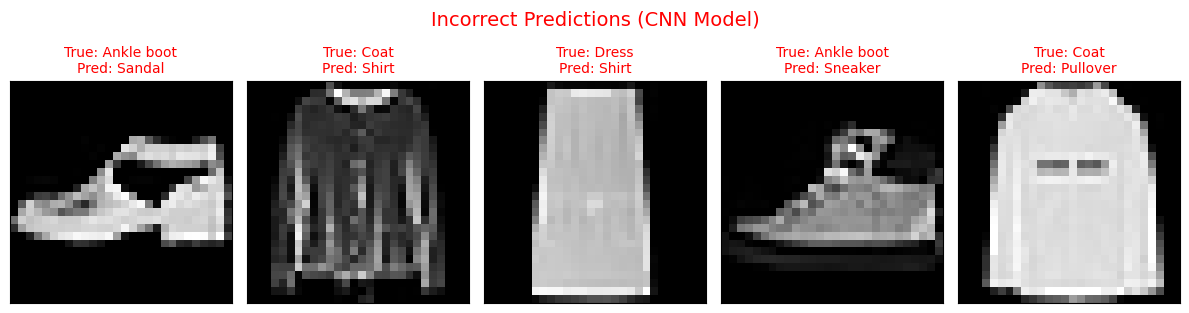

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import numpy as np

def evaluate_analysis(model, dataloader, class_names, model_name, device):
    model.eval()

    all_preds = []
    all_labels = []

    correct_samples = []   # To store (img, true, pred) for correct
    incorrect_samples = [] # To store (img, true, pred) for incorrect

    print(f"\n{'='*20} Analyzing {model_name} {'='*20}")

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            # Store for Confusion Matrix
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

            # Store samples for visualization
            # We move data to CPU once to avoid multiple calls
            images_cpu = images.cpu()
            labels_cpu = labels.cpu()
            preds_cpu = predicted.cpu()

            for i in range(len(labels)):
                # We need only a few samples, so we stop collecting when full
                if len(correct_samples) < 5 and labels_cpu[i] == preds_cpu[i]:
                    correct_samples.append((images_cpu[i], labels_cpu[i].item(), preds_cpu[i].item()))

                if len(incorrect_samples) < 5 and labels_cpu[i] != preds_cpu[i]:
                    incorrect_samples.append((images_cpu[i], labels_cpu[i].item(), preds_cpu[i].item()))

                # Optimization: Stop loop if we have enough samples of both
                if len(correct_samples) >= 5 and len(incorrect_samples) >= 5:
                    break

    # --- 1. Calculate & Print Accuracy ---
    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)
    accuracy = 100 * (all_preds == all_labels).sum() / len(all_labels)
    print(f"Final Test Accuracy: {accuracy:.2f}%")

    # --- 2. Plot Confusion Matrix ---
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # --- 3. Visualize Samples (Correct vs Incorrect) ---
    # Helper to plot a row of images
    def plot_row(samples, title, color):
        if not samples: return
        fig, axes = plt.subplots(1, 5, figsize=(12, 3))
        fig.suptitle(title, fontsize=14, color=color, y=1.05)

        for i, (img, true_lbl, pred_lbl) in enumerate(samples):
            # Un-normalize
            img = img / 2 + 0.5
            npimg = img.numpy()

            axes[i].imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
            axes[i].set_xticks([])
            axes[i].set_yticks([])
            axes[i].set_title(f"True: {class_names[true_lbl]}\nPred: {class_names[pred_lbl]}",
                              fontsize=10, color=color)
        plt.tight_layout()
        plt.show()

    # Show Correct Samples
    plot_row(correct_samples, f"Correct Predictions ({model_name})", 'green')

    # Show Incorrect Samples
    plot_row(incorrect_samples, f"Incorrect Predictions ({model_name})", 'red')

# ---------------------------------------------------------
# Run Analysis
# ---------------------------------------------------------

device = "cuda" if torch.cuda.is_available() else "cpu"

# 1. Analyze MLP
evaluate_analysis(mlp_model, test_loader, class_names, "MLP Model", device)

# 2. Analyze CNN
evaluate_analysis(cnn_model, test_loader, class_names, "CNN Model", device)

# 6. Plotting Training Metrics

In this section, we visualize the training history to diagnose the learning behavior and check for overfitting.

### Analysis of Loss Curves
* **MLP (Blue Lines):** The MLP shows a stable convergence. The Validation Loss (Dashed Blue) decreases and then plateaus around **0.35**. The gap between Training and Validation loss is moderate, indicating acceptable generalization.
* **CNN (Red Lines):** The CNN shows a classic sign of **Overfitting**.
    * The **Training Loss (Solid Red)** drops rapidly to nearly **0**.
    * However, the **Validation Loss (Dashed Red)** reaches its minimum around **Epoch 5** (approx 0.22) and then **starts increasing** significantly, reaching ~0.37 by Epoch 20.
    * This "U-shape" in the validation loss confirms that after Epoch 5, the model started memorizing the training data instead of learning general patterns.

### Analysis of Accuracy Curves
* **MLP:** The validation accuracy stabilizes around **88-89%**.
* **CNN:** The model quickly reaches a high validation accuracy (**~92%**), but while the Training Accuracy keeps climbing to **~100%**, the Validation Accuracy does not improve further.

### Conclusion on Overfitting
The graphs clearly indicate that the **CNN model is overfitting**. While it achieves higher accuracy than the MLP, the divergence of the validation loss suggests that training for 20 epochs was too long without stronger regularization or early stopping. The optimal model was actually obtained around **Epoch 5 or 6**.

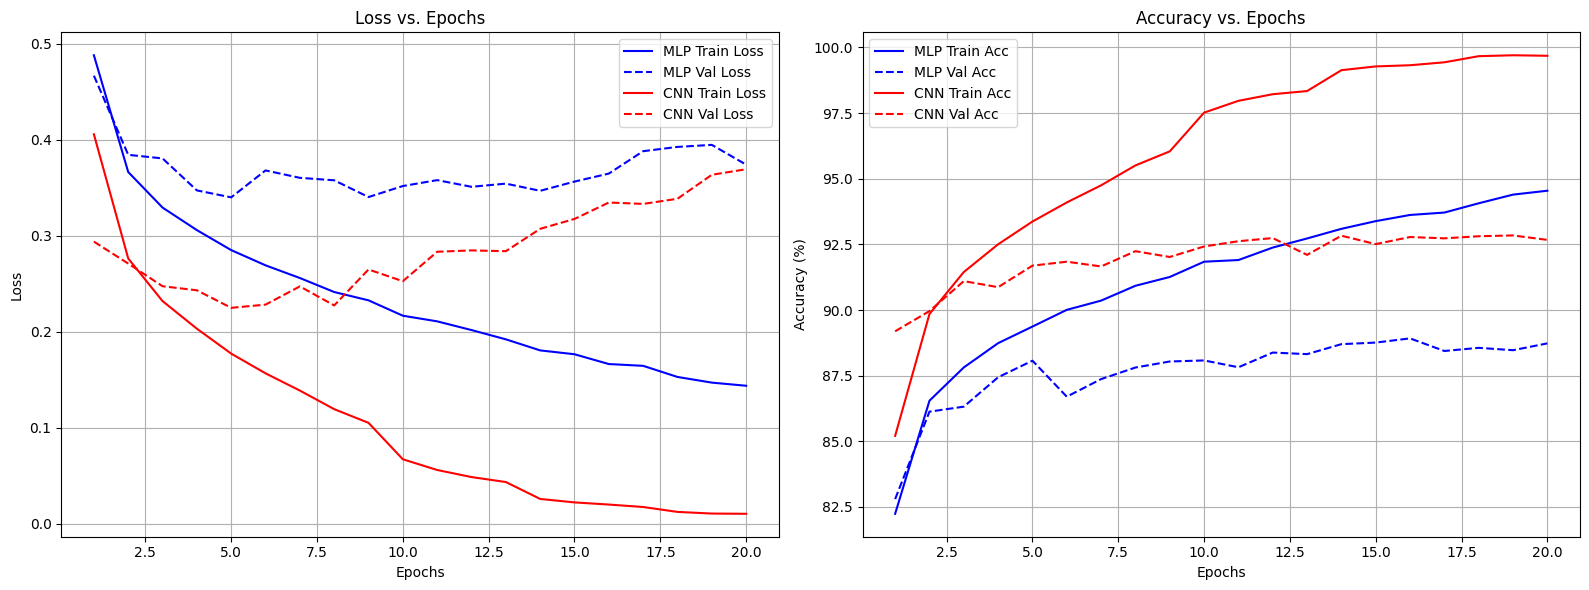

In [12]:
import matplotlib.pyplot as plt

def plot_training_history(mlp_hist, cnn_hist):
    epochs = range(1, len(mlp_hist['train_loss']) + 1)

    plt.figure(figsize=(16, 6))

    # --- Plot 1: Loss Comparison ---
    plt.subplot(1, 2, 1)
    # MLP Plots
    plt.plot(epochs, mlp_hist['train_loss'], 'b-', label='MLP Train Loss')
    plt.plot(epochs, mlp_hist['val_loss'], 'b--', label='MLP Val Loss')
    # CNN Plots
    plt.plot(epochs, cnn_hist['train_loss'], 'r-', label='CNN Train Loss')
    plt.plot(epochs, cnn_hist['val_loss'], 'r--', label='CNN Val Loss')

    plt.title('Loss vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # --- Plot 2: Accuracy Comparison ---
    plt.subplot(1, 2, 2)
    # MLP Plots
    plt.plot(epochs, mlp_hist['train_acc'], 'b-', label='MLP Train Acc')
    plt.plot(epochs, mlp_hist['val_acc'], 'b--', label='MLP Val Acc')
    # CNN Plots
    plt.plot(epochs, cnn_hist['train_acc'], 'r-', label='CNN Train Acc')
    plt.plot(epochs, cnn_hist['val_acc'], 'r--', label='CNN Val Acc')

    plt.title('Accuracy vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Run the plotting function
# Assumes 'mlp_history' and 'cnn_history' are available from the training step
plot_training_history(mlp_history, cnn_history)

# 7. Model Improvement (Bonus Section)

In this project, to satisfy the "Model Improvement" requirements and achieve higher accuracy, we implemented a **Convolutional Neural Network (CNN)** instead of just tweaking the MLP.

Our CNN implementation incorporates **all** the suggested improvement techniques listed in the assignment requirements:

### 1. Adding Dropout
* **Implementation:** We included a `nn.Dropout(0.25)` layer in the fully connected section of our CNN.
* **Effect:** This helped in regularizing the large dense layer (with 600 neurons) to prevent even more severe overfitting.

### 2. Using Batch Normalization
* **Implementation:** We applied `nn.BatchNorm2d` after every convolutional layer.
* **Effect:** This normalized the feature maps, leading to faster convergence and more stable training compared to the standard MLP.

### 3. Modifying Architecture (Layers & Neurons)
* **Implementation:** We completely shifted the paradigm from a simple Feed-Forward network (MLP) to a Deep Convolutional Network. We replaced flat layers with:
    * 2 Convolutional Layers (32 and 64 filters) to capture spatial features.
    * 2 MaxPool layers to reduce dimensionality.
    * A larger hidden layer (600 neurons vs. 256 in MLP).
* **Effect:** This allowed the model to understand spatial hierarchies (edges, shapes) which is impossible for an MLP that flattens the input immediately.

### 4. Learning Rate Scheduling
* **Implementation:** Instead of a fixed learning rate, we implemented a **`ReduceLROnPlateau` scheduler**.
* **Effect:** This dynamic adjustment reduced the learning rate when the validation loss plateaued, allowing the model to find a better local minimum.

### Final Result Comparison
By combining these improvements, we achieved a significant boost in performance:
* **Baseline MLP Accuracy:** ~88.7%
* **Improved CNN Accuracy:** ~92.8%
* **Improvement:** **+4.1%** accuracy gain.

This demonstrates that choosing the right architecture (CNN) combined with regularization techniques (Dropout, BatchNorm) is the most effective way to improve image classification models.